datos de https://coronavirus.gob.mx/datos/#DownZCSV

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from utils import load_dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.style.use('https://raw.githubusercontent.com/davidbetancur8/palettes/master/eafit.mplstyle')

In [3]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
df_creibles = load_dataset("data/julio6.csv", 15)
df_creibles = df_creibles.rename(columns={"fallecio": "falleció"})

In [5]:
df_creibles.head()

,SEXO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,falleció
0,1,1,81,2,2,2,2,2,1,1,2,2,2,2,1
1,2,1,46,97,2,2,2,2,2,2,2,1,2,2,0
2,2,2,29,97,2,2,2,2,2,2,2,2,2,2,0
3,1,2,28,2,2,2,2,2,2,2,1,2,1,2,0
4,1,2,50,2,2,2,2,2,2,2,2,2,2,2,0


In [6]:
df_creibles.describe(include="all")

,SEXO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,falleció
count,231333.0,231333.0,231333.000000,231333.0,231333.0,231333.0,231333.0,231333.0,231333.0,231333.0,231333.0,231333.0,231333.0,231333.0,231333.0
unique,2.0,3.0,NaN,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
top,2.0,2.0,NaN,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
freq,126599.0,174911.0,NaN,126599.0,191977.0,226496.0,224172.0,227253.0,183471.0,223534.0,225043.0,185112.0,225485.0,212588.0,200694.0
mean,NaN,NaN,45.854642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,16.325302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


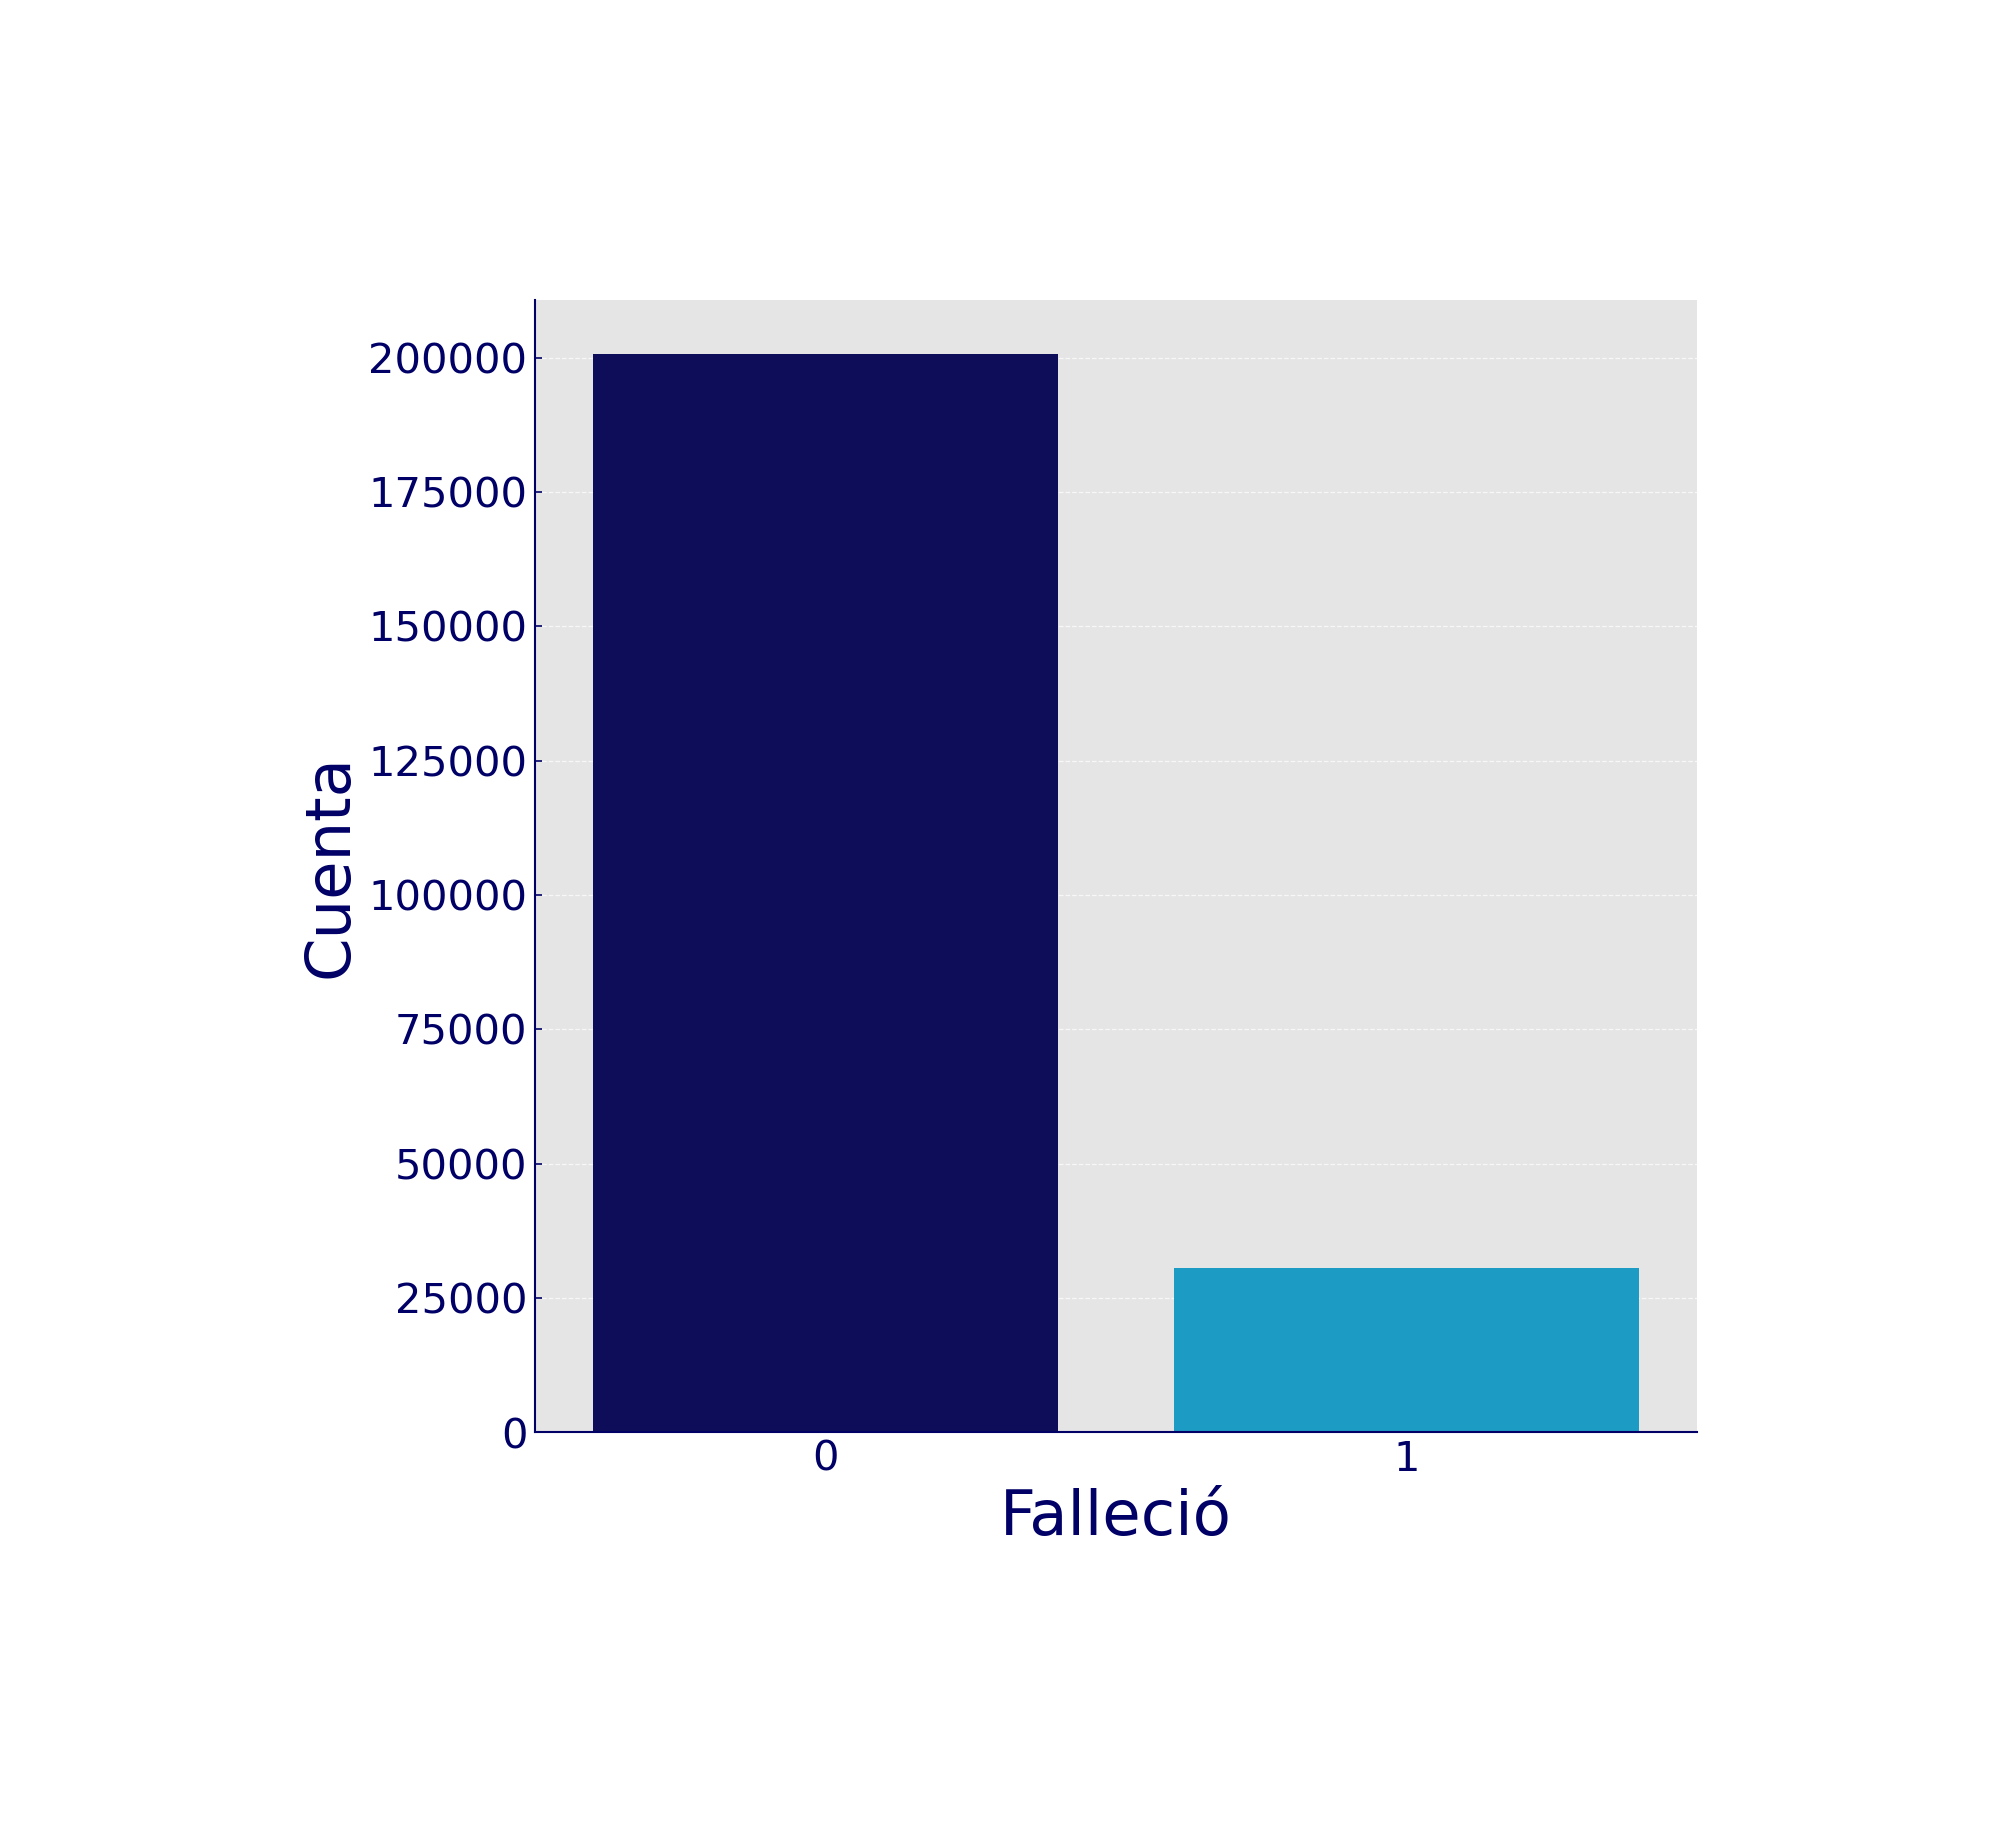

In [7]:
ax = sns.countplot(df_creibles["falleció"])
plt.xlabel('Falleció', fontsize=30)
plt.ylabel('Cuenta', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig(f'fallecio.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

In [8]:
columnas = ['NEUMONIA', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO']

total de pacientes: 231333


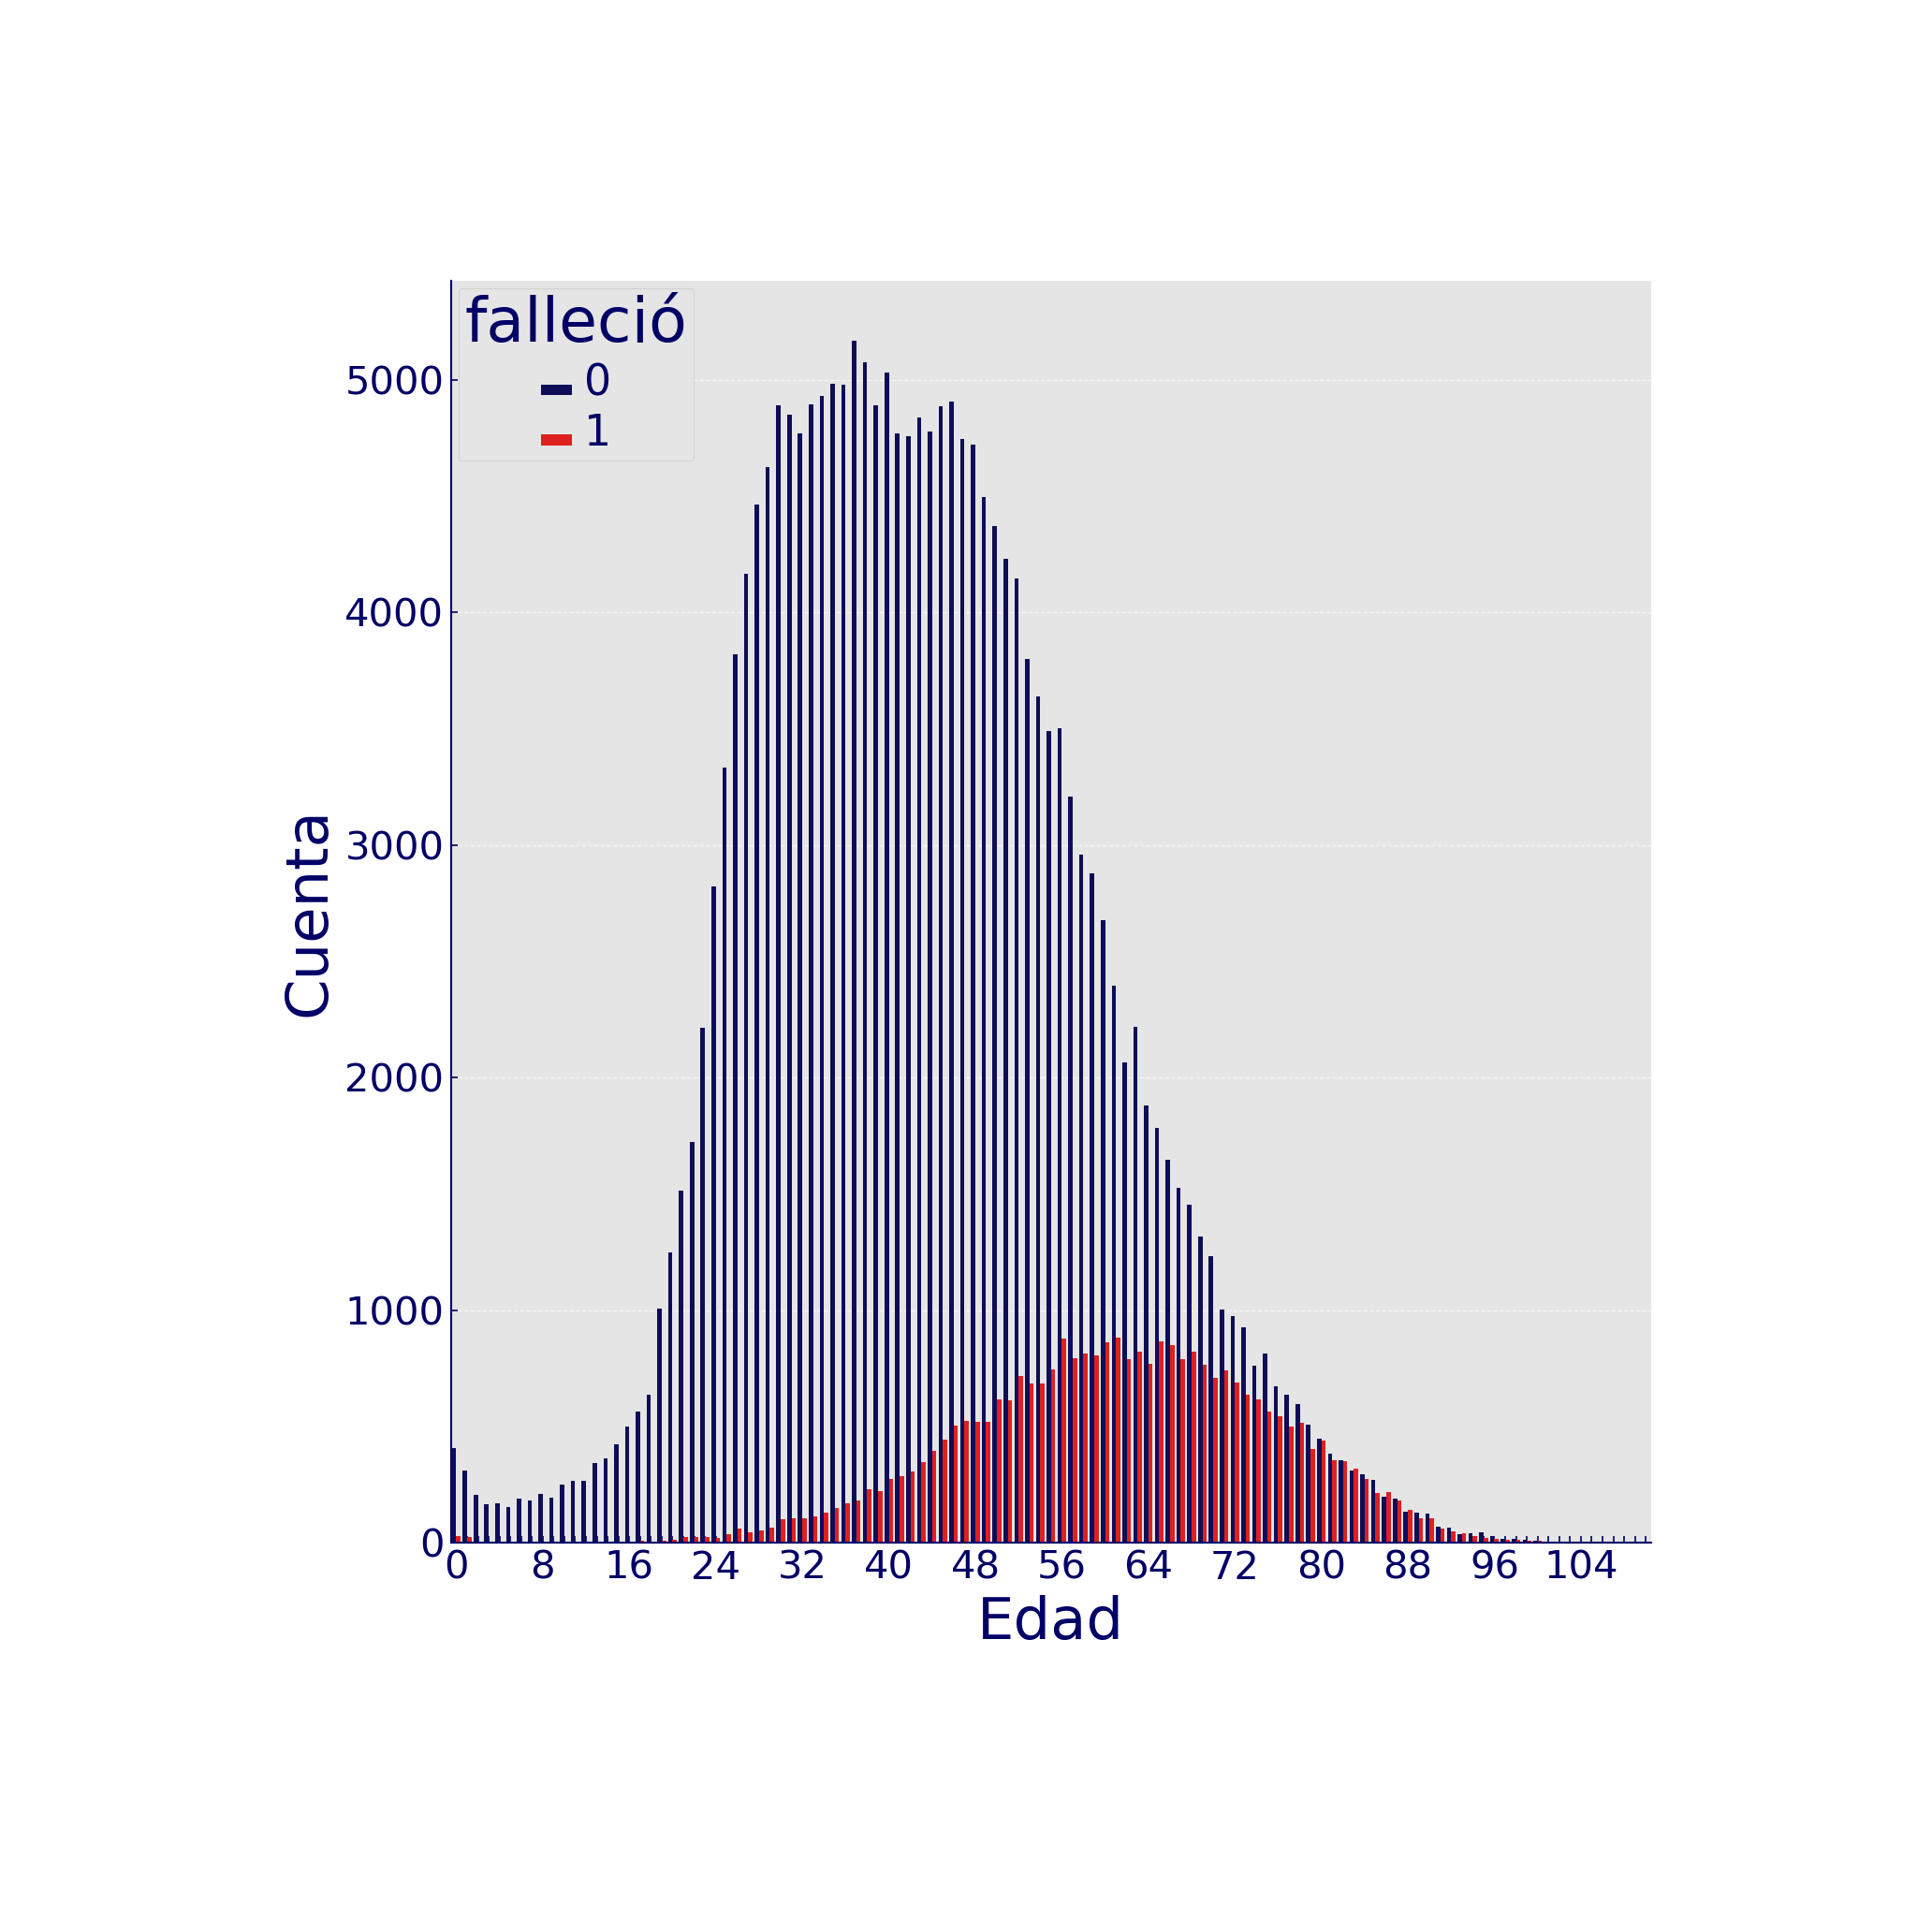

In [10]:
print(f"total de pacientes: {df_creibles.shape[0]}")
ax = sns.countplot(x="EDAD", data=df_creibles, hue="falleció", palette=["#000066", "red"])
# sns.barplot(x="edad", y="cuenta", data=cuentas_contagiados, color="red", ax=ax)
plt.xlabel('Edad', fontsize=30)
plt.ylabel('Cuenta', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
for i,label in enumerate(ax.get_xticklabels()):
    if i%8 == 0:
        pass
    else:
        label.set_visible(False)
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32')
plt.tight_layout()
plt.savefig(f'edades.png',bbox_inches='tight', transparent="True", pad_inches = 0)

total de pacientes sanos: 47671


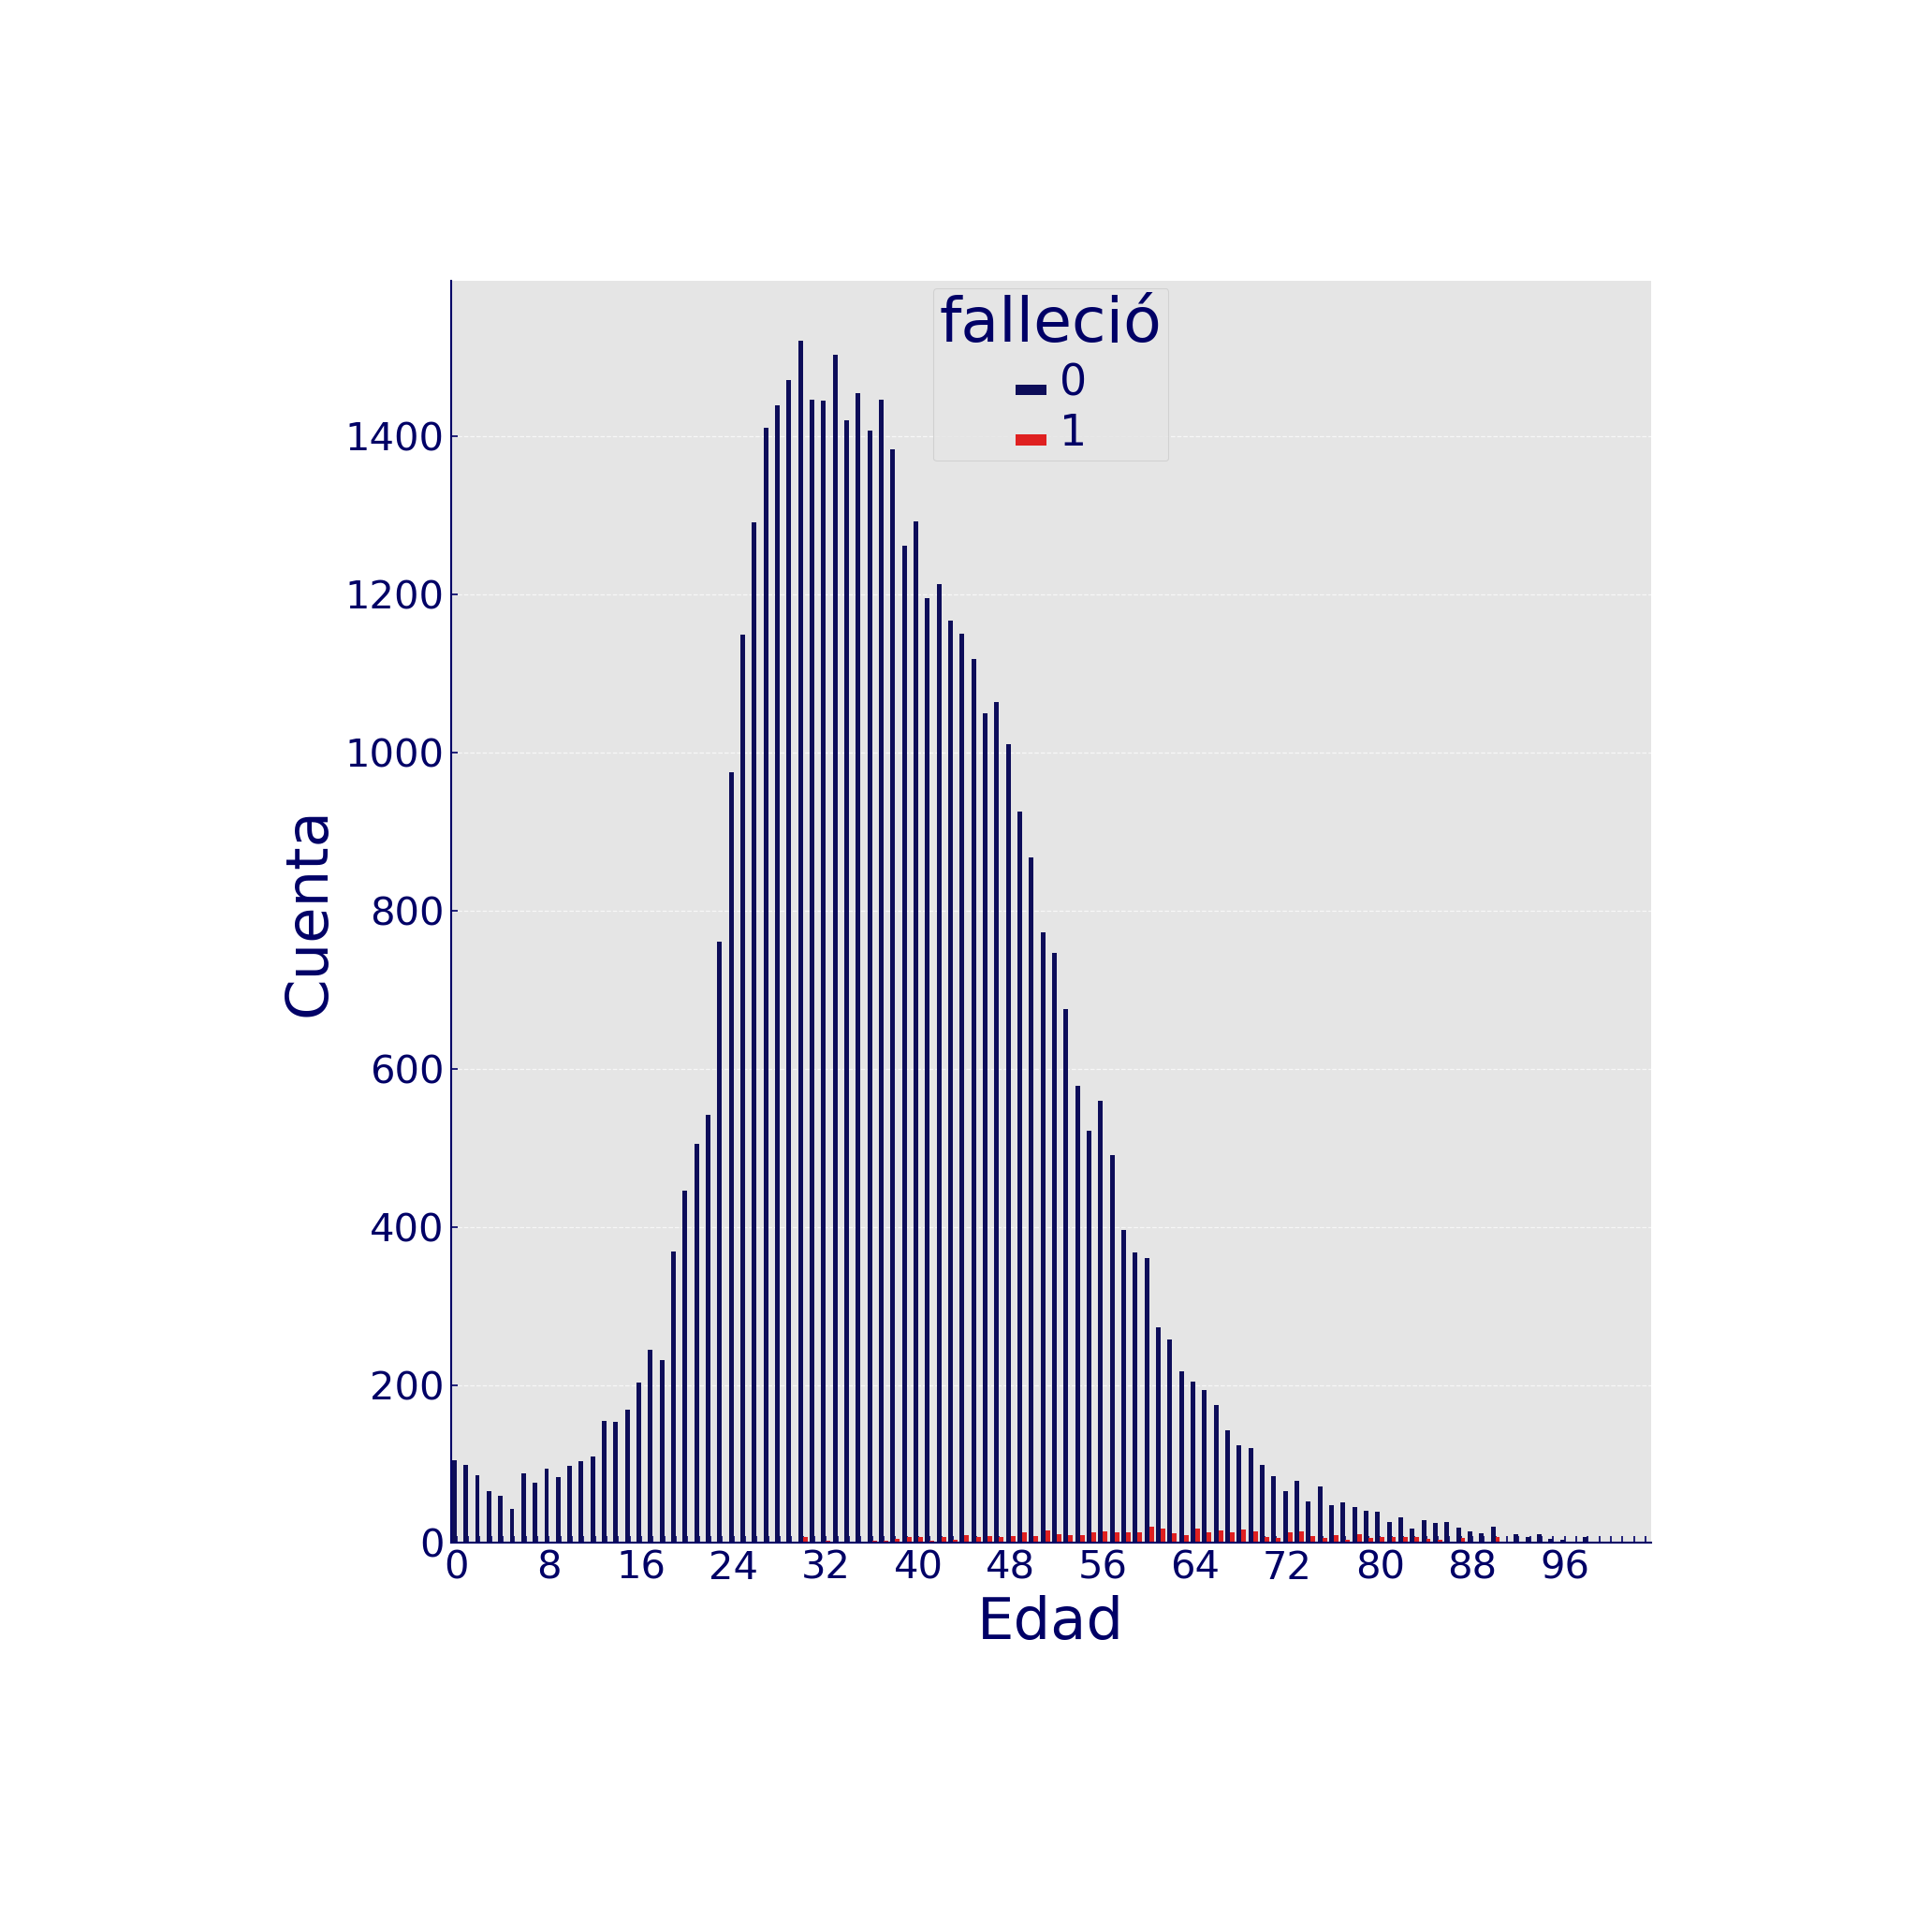

In [11]:
df_clean = pd.Series({col:2 for col in df_creibles.drop(["EDAD", "SEXO", "falleció"], axis=1).columns})
df_sanos = df_creibles[(df_creibles.drop(["EDAD", "SEXO", "falleció"], axis=1) == df_clean).all(axis=1)]
print(f"total de pacientes sanos: {df_sanos.shape[0]}")
ax = sns.countplot(x="EDAD", data=df_sanos, hue="falleció", palette=["#000066", "red"])
# sns.barplot(x="edad", y="cuenta", data=cuentas_contagiados, color="red", ax=ax)
plt.xlabel('Edad', fontsize=30)
plt.ylabel('Cuenta', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
for i,label in enumerate(ax.get_xticklabels()):
    if i%8 == 0:
        pass
    else:
        label.set_visible(False)
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32')
plt.tight_layout()
plt.savefig(f'edades_sanos.png',bbox_inches='tight', transparent="True", pad_inches = 0)

total de pacientes con 1 sola comorbilidad: 27941


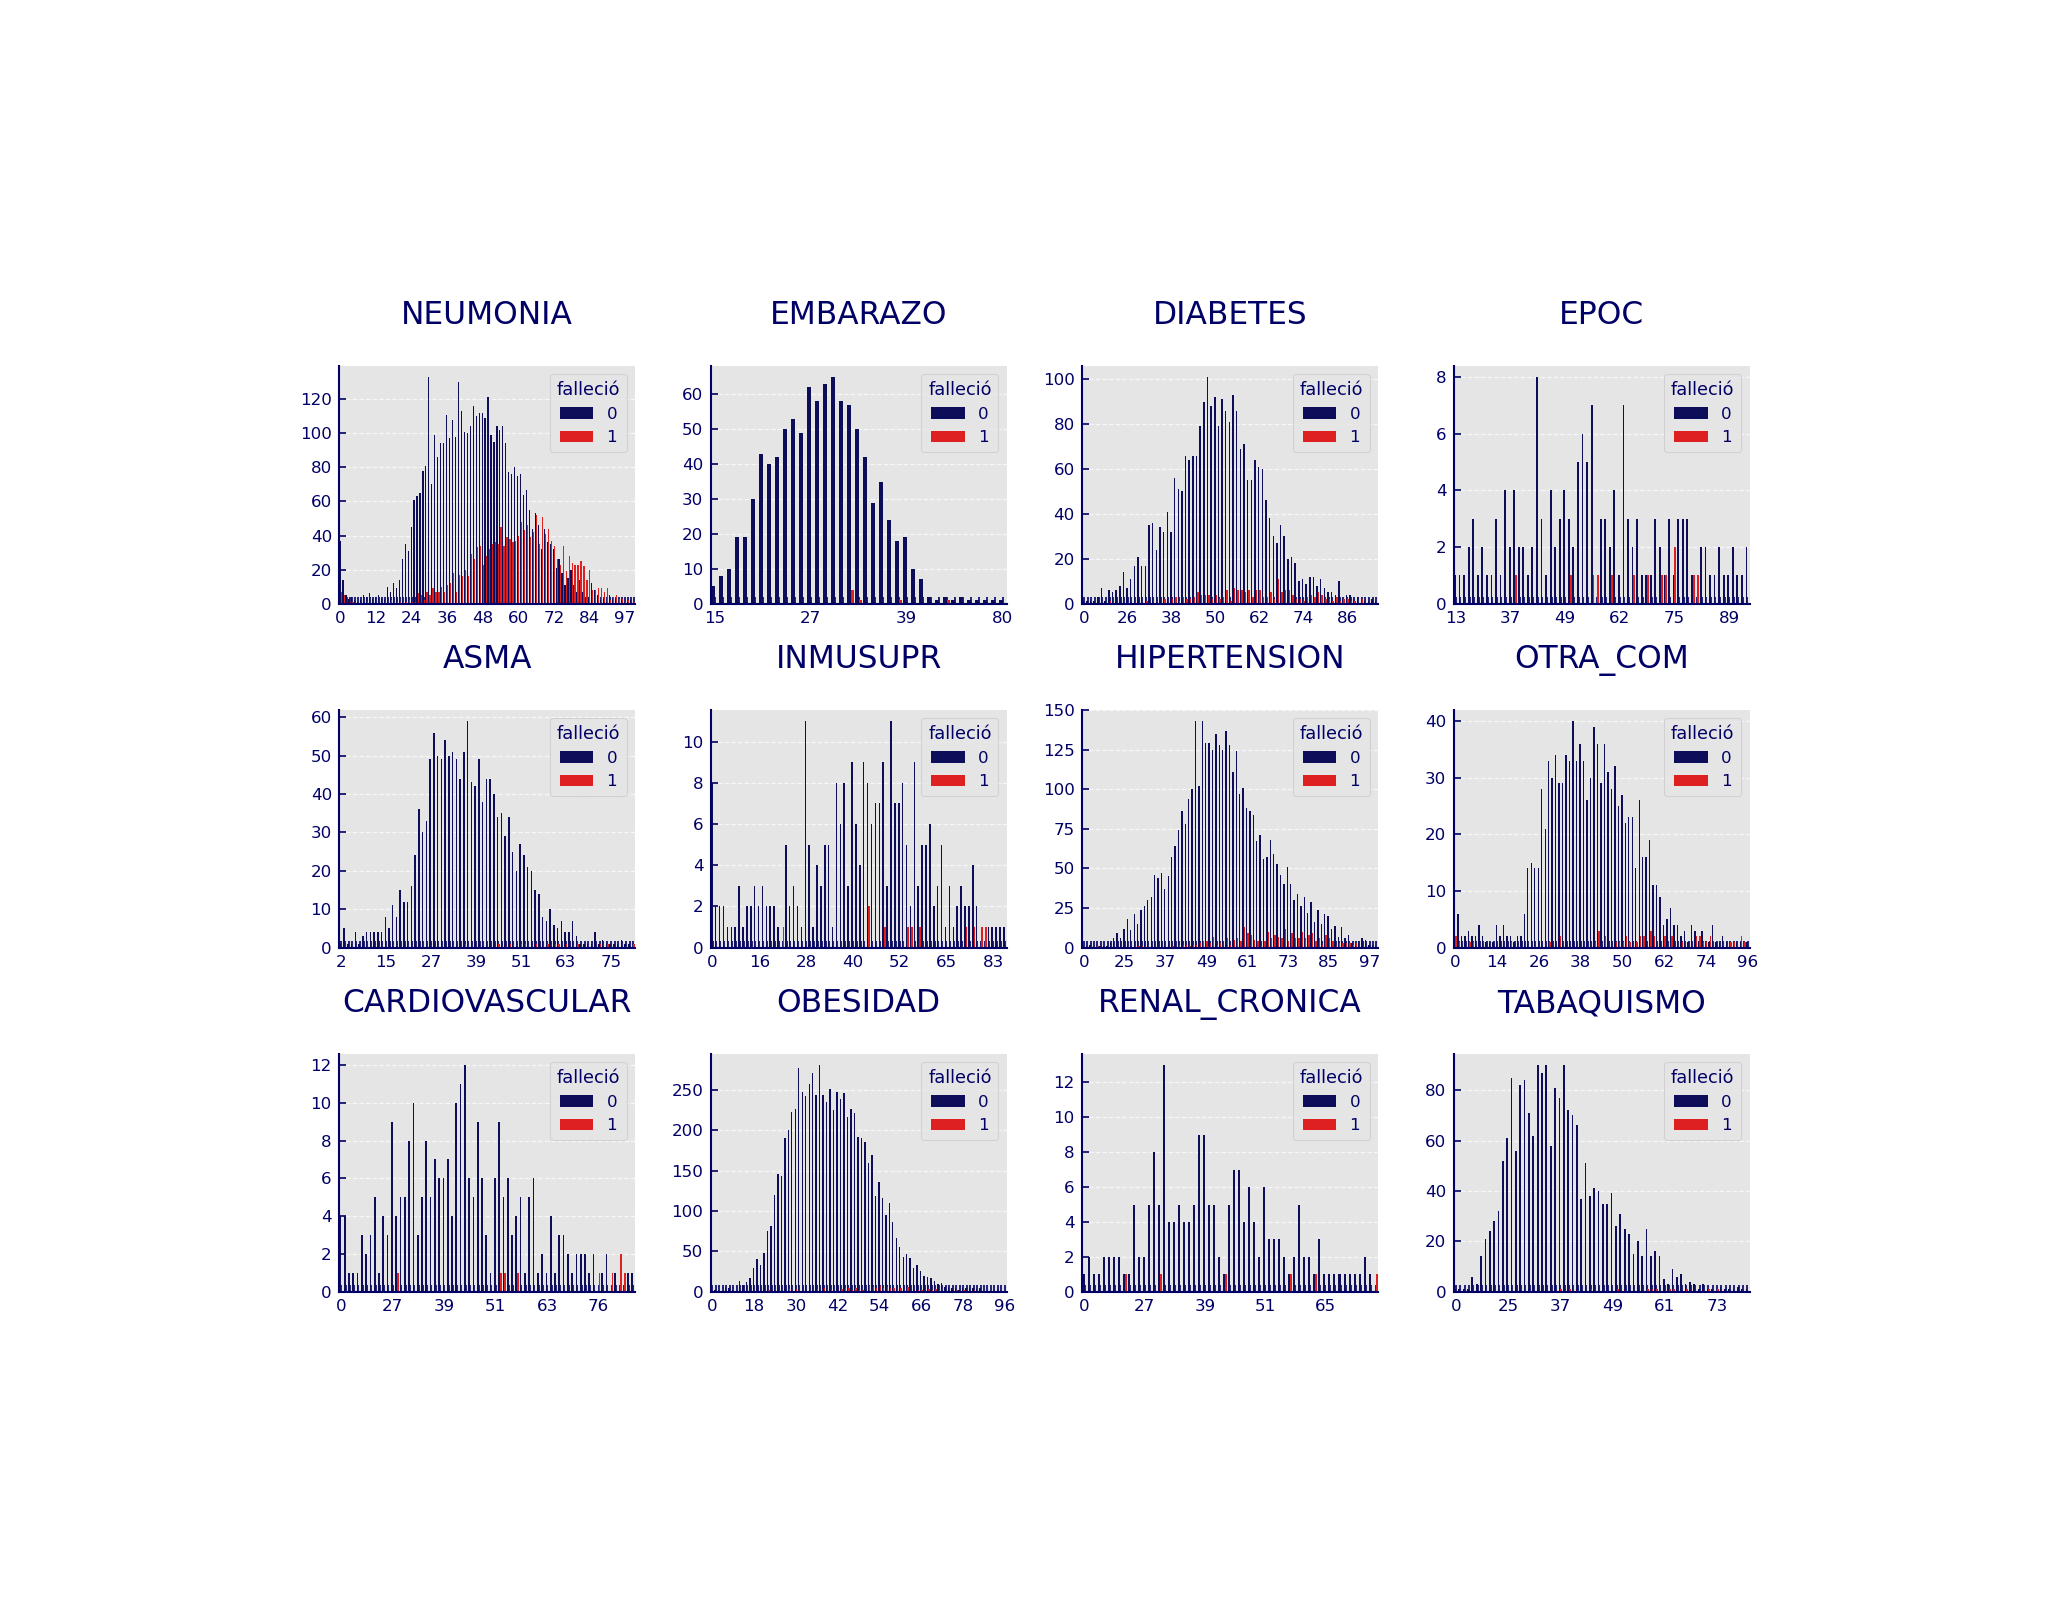

In [14]:
f, ax = plt.subplots(3, 4, figsize=(10,7))

cont = 0
total = 0
for i in range(3):
    for j in range(4):
        df_clean = pd.Series({col:2 for col in df_creibles.drop(["EDAD", "SEXO", "falleció"], axis=1).columns})
        df_clean[columnas[cont]] = 1
        df_comorb = df_creibles[(df_creibles.drop(["EDAD", "SEXO", "falleció"], axis=1) == df_clean).all(axis=1)]
        total += df_comorb.shape[0]
        sns.countplot(x="EDAD", data=df_comorb, hue="falleció", ax=ax[i,j], palette=["#000066", "red"]).set_title(columnas[cont], fontsize=15)
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel('')
        cont+=1
        for ind,label in enumerate(ax[i,j].get_xticklabels()):
            if ind%12 == 0:
                pass
            else:
                label.set_visible(False)
print(f"total de pacientes con 1 sola comorbilidad: {total}")        
plt.tight_layout()
plt.savefig(f'comorbilidades_unicas_edades.png',bbox_inches='tight', pad_inches = 0, dpi=plt.gcf().dpi)
plt.show()

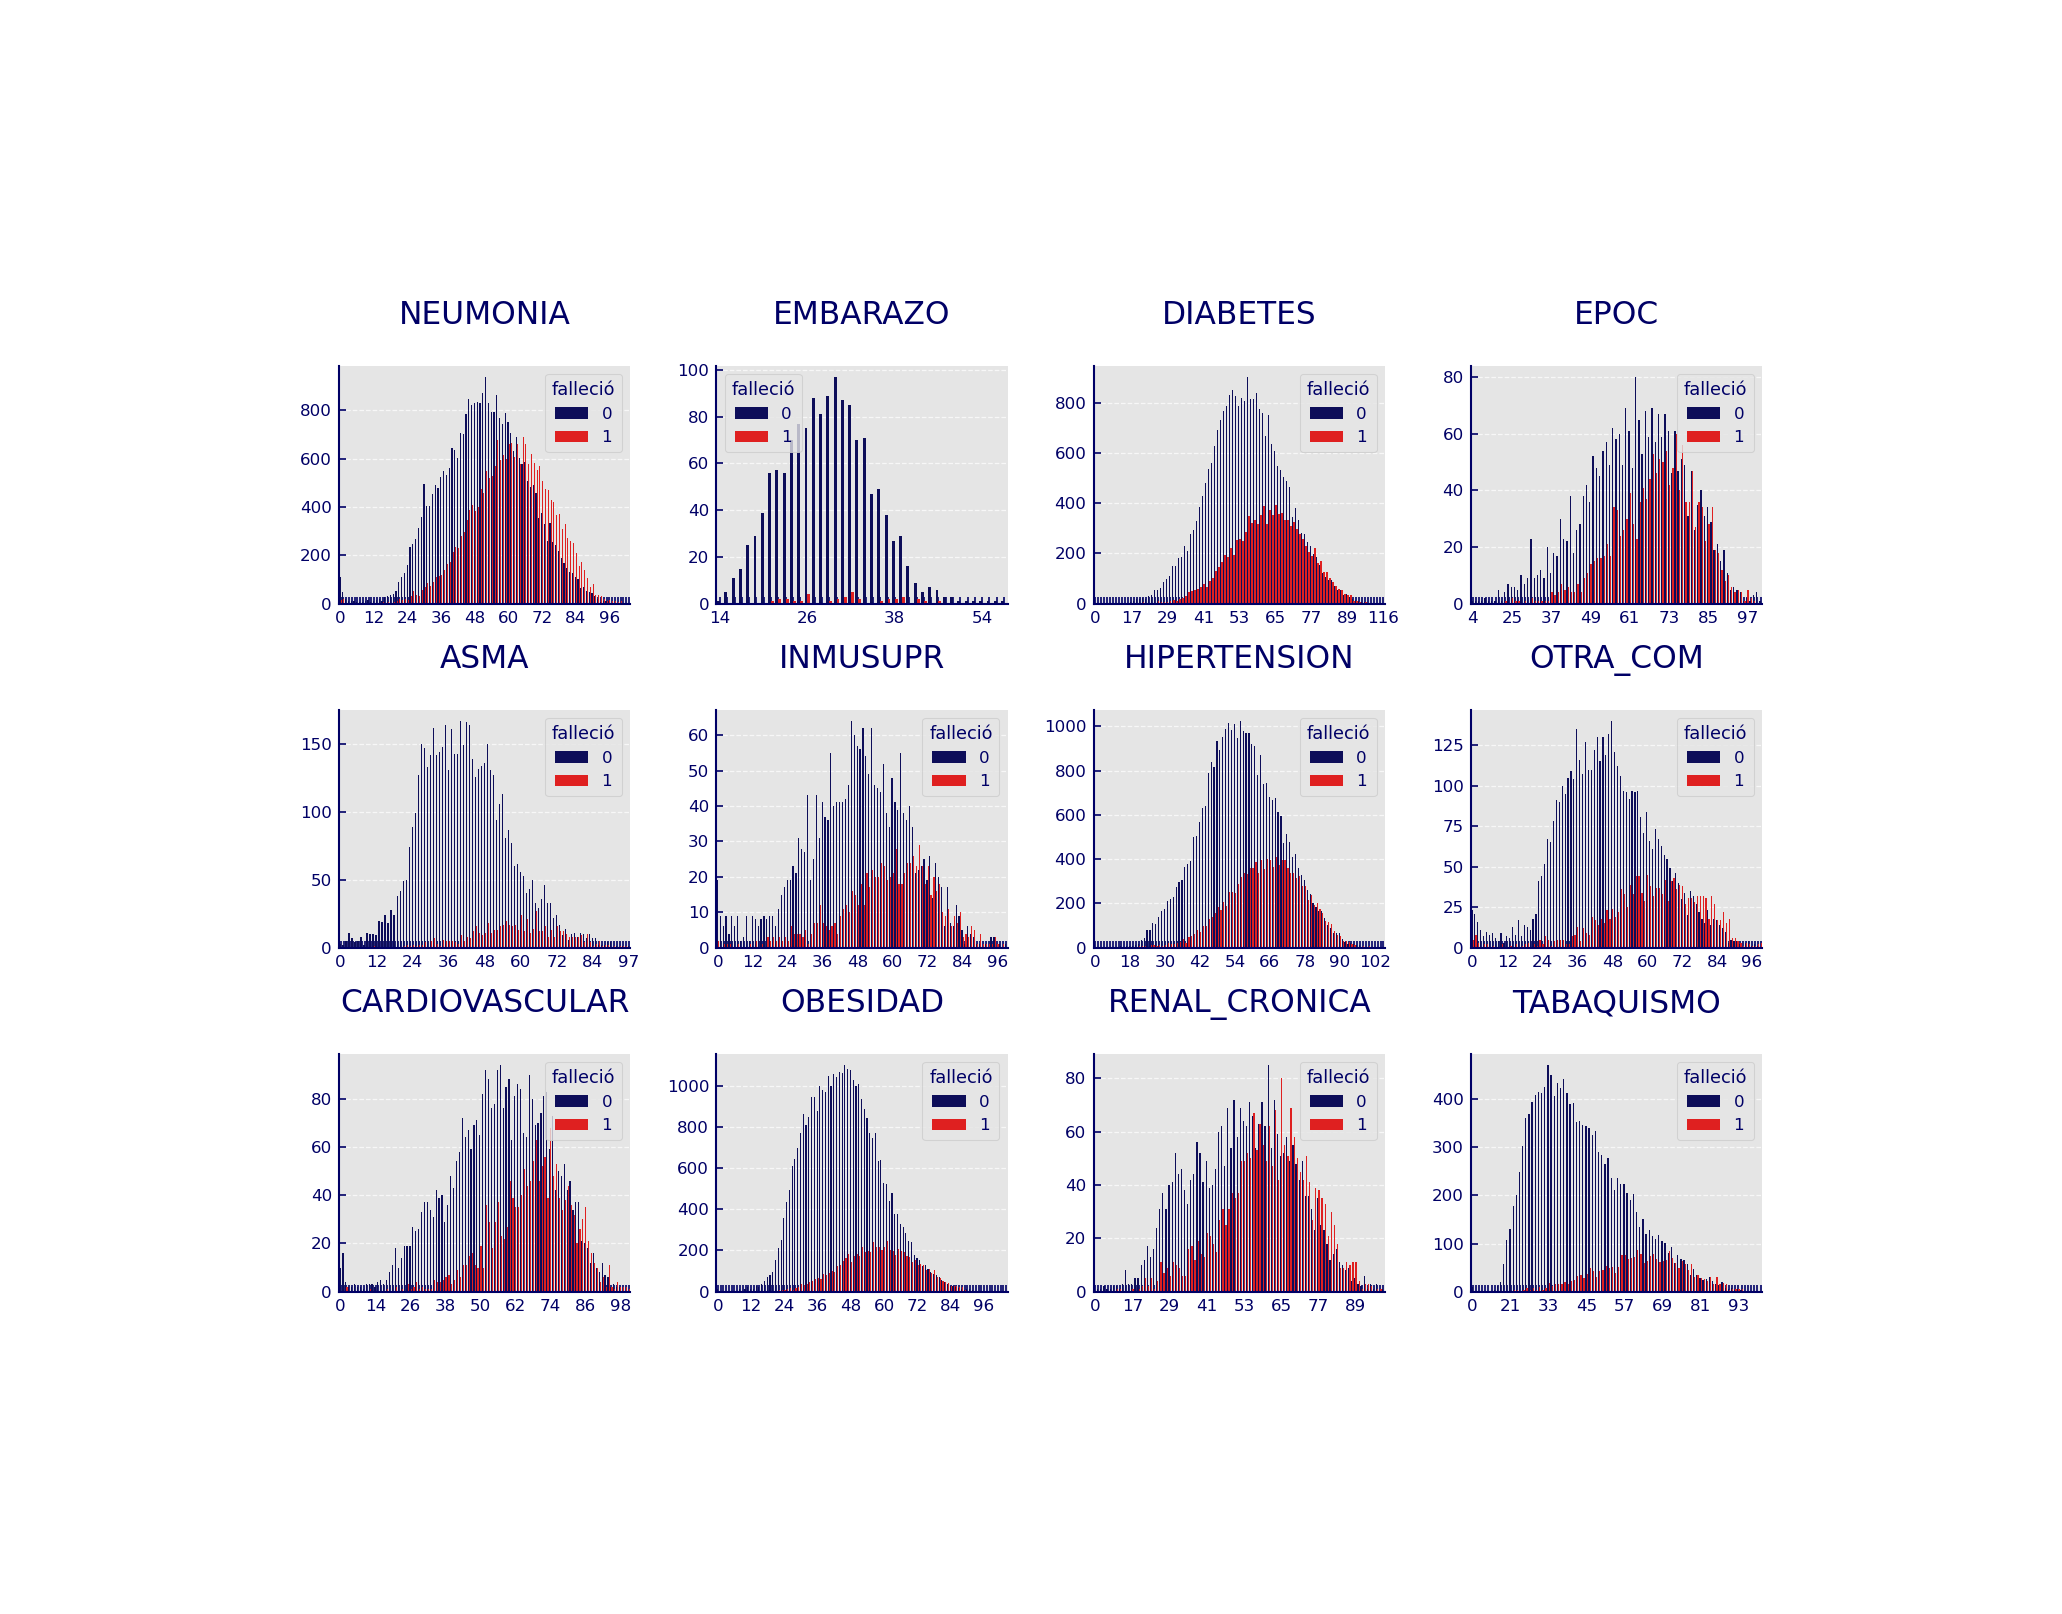

In [13]:
f, ax = plt.subplots(3, 4, figsize=(10,7))

cont = 0
for i in range(3):
    for j in range(4):
        df_comorb = df_creibles[df_creibles[columnas[cont]] == 1]
        sns.countplot(x="EDAD", data=df_comorb, hue="falleció", ax=ax[i,j], palette=["#000066", "red"]).set_title(columnas[cont], fontsize=15)
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel('')
        cont+=1
        for ind,label in enumerate(ax[i,j].get_xticklabels()):
            if ind%12 == 0:
                pass
            else:
                label.set_visible(False)
        
plt.tight_layout()
plt.savefig(f'comorbilidades_edades.png',bbox_inches='tight', pad_inches = 0, dpi=plt.gcf().dpi)
plt.show()

In [15]:
231333 - 47671 - 27941

155721